In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd '/content/drive/MyDrive/Colab Notebooks/deep learning/Cat vs Dog Image Classification/dataset'

/content/drive/MyDrive/Colab Notebooks/deep learning/Cat vs Dog Image Classification/dataset


In [3]:
ls

test/  train/


### image_dataset_from_directory

In [4]:
import tensorflow as tf
import keras


In [5]:
# generators

train_ds = keras.utils.image_dataset_from_directory(
    directory = 'train/',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(224,224),
    shuffle=True,
    validation_split=0.2,
    subset='training',
    seed=7
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory='train/',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(224,224),
    shuffle=True,
    validation_split=0.2,
    subset='validation',
    seed=7
)


test_ds = keras.utils.image_dataset_from_directory(
    directory = 'test/',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(224,224),
    shuffle=True,
    seed=7
)

Found 500 files belonging to 2 classes.
Using 400 files for training.
Found 500 files belonging to 2 classes.
Using 100 files for validation.
Found 5010 files belonging to 2 classes.


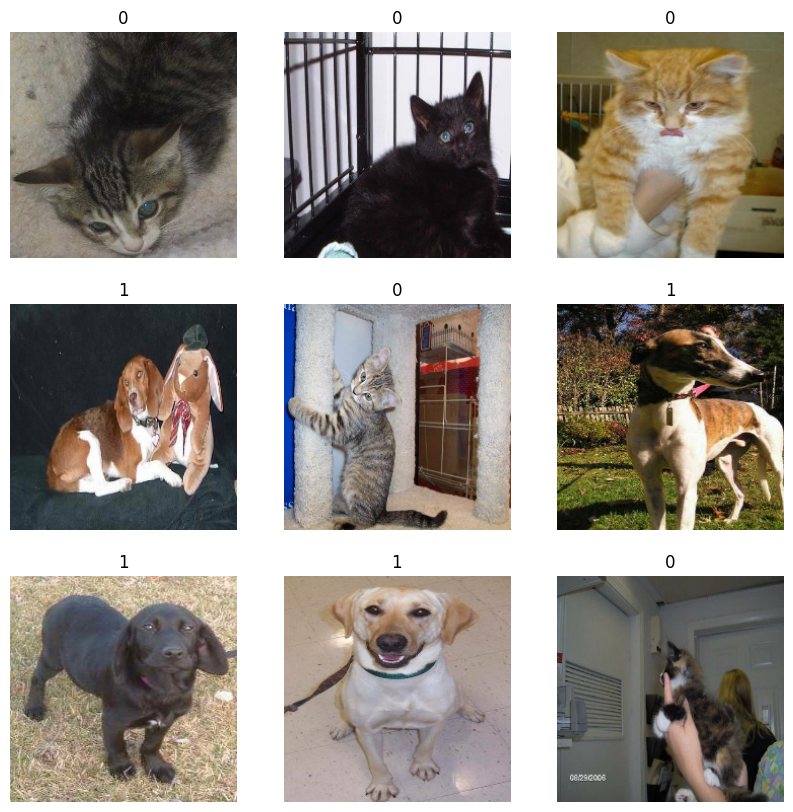

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [7]:
def process(image,label):
  image=tf.cast(image/255.,tf.float32)
  return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)
test_ds=test_ds.map(process)

### Image Data Generator

In [8]:
from keras.preprocessing.image import ImageDataGenerator

In [9]:
train_datagen = ImageDataGenerator(rescale=1./255., validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255.)

train_generator = train_datagen.flow_from_directory('train/',
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='binary',
                                                    subset='training',
                                                    shuffle=True,
                                                    seed=7)

val_generator = train_datagen.flow_from_directory('train/',
                                                  target_size=(224, 224),
                                                  batch_size=32,
                                                  class_mode='binary',
                                                  subset='validation',
                                                  shuffle=True,
                                                  seed=7)

test_generator = test_datagen.flow_from_directory('test/',
                                                  target_size=(224, 224),
                                                  batch_size=32,
                                                  shuffle=True,
                                                  class_mode='binary')



Found 400 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 5010 images belonging to 2 classes.


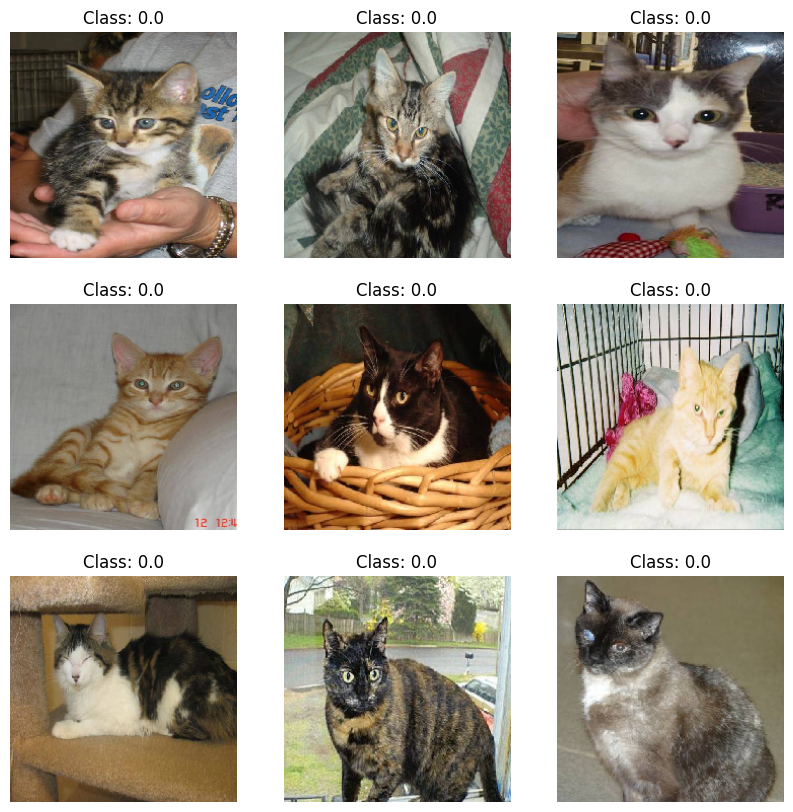

In [10]:
import matplotlib.pyplot as plt

# Get a batch of images from the generator
images, labels = train_generator.next()

# Plot the images
plt.figure(figsize=(10, 10))
for i in range(9):  # Plotting the first 9 images
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title('Class: {}'.format(labels[i]))
    plt.axis("off")
plt.show()


**Data Augmentation**

In [13]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255., # rescaling
                                   rotation_range = 40,  # for augmentation
                                   width_shift_range = 0.2,
                                   validation_split = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0/255.,validation_split = 0.2)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0/255.)

train_generator = train_datagen.flow_from_directory("train/",
                                                    batch_size = 32,
                                                    subset="training",
                                                    class_mode = 'binary',
                                                    target_size = (224, 224))

test_generator = test_datagen.flow_from_directory("test/",
                                                    batch_size = 32,
                                                    class_mode = 'binary',
                                                    target_size = (224, 224))

val_generator = val_datagen.flow_from_directory("train/",
                                                subset = "validation",
                                                    batch_size = 32,
                                                    class_mode = 'binary',
                                                    target_size = (224, 224))

Found 400 images belonging to 2 classes.
Found 5010 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


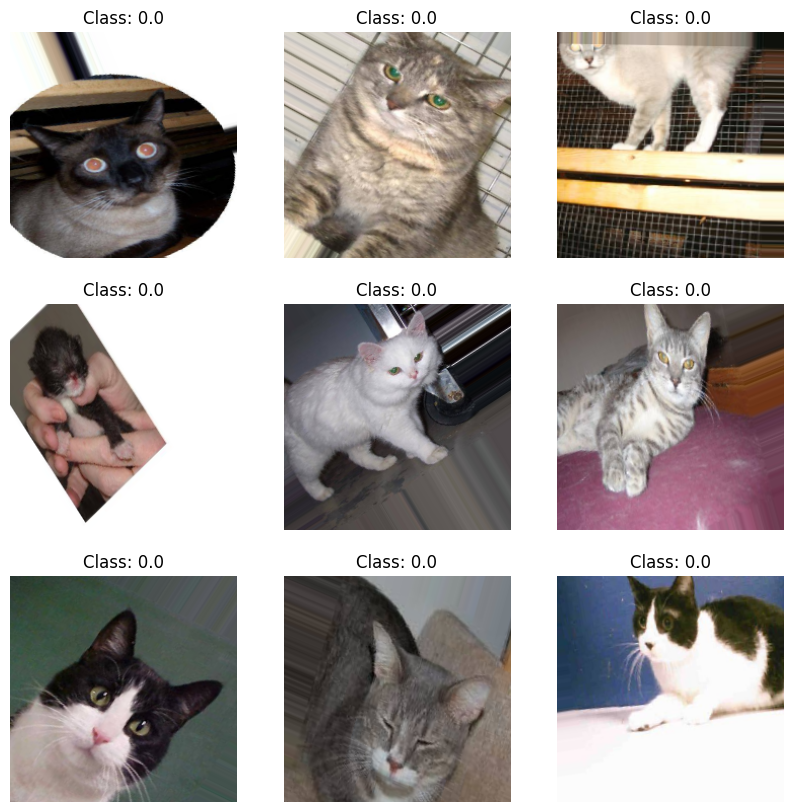

In [14]:
import matplotlib.pyplot as plt

# Get a batch of images from the generato
images, labels = train_generator.next()

# Plot the images
plt.figure(figsize=(10, 10))
for i in range(9):  # Plotting the first 9 images
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title('Class: {}'.format(labels[i]))
    plt.axis("off")
plt.show()
